- Data processing are  presented on Jupyter to better intrercat wiht. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error, auc, accuracy_score, confusion_matrix, mean_squared_error

In [ ]:

pd.options.display.max_rows =10
pd.options.display.max_columns = 500
pd.set_option.display_width=1000

df=pd.read_excel('data/GD6.xlsx', index_col=None, header=0)

In [ ]:
!pip install pandas --upgrade

In [ ]:
df.tail()

In [ ]:
df.info()

In [ ]:
df.keys()

In [ ]:
df.shape

In [86]:
df=df.drop(['NAME', 'ENAME'], axis=1)

In [87]:
df.head()

CPR_NO                 SCH_NM         PROV_NM    SUBM Teacher_Gender  \
0  70913390  المعهد الديني الجعفري  محافظة العاصمة  العلوم         مدرسين   
1  71105956  المعهد الديني الجعفري  محافظة العاصمة  العلوم         مدرسين   
2  70712190  المعهد الديني الجعفري  محافظة العاصمة  العلوم         مدرسين   
3  70207496  المعهد الديني الجعفري  محافظة العاصمة  العلوم         مدرسين   
4  70507953  المعهد الديني الجعفري  محافظة العاصمة  العلوم         مدرسين   

   ACHIEVEMENTS1  ACHIEVEMENTS2  MIDTERM1  MIDTERM2  FINAL1  FINAL2  TOTAL1  \
0           28.0           30.0      17.0      17.0    45.0    33.0    90.0   
1           27.0           29.0      14.0      16.0    41.5    37.0    83.0   
2           27.0           27.0      13.0      15.0    27.5    37.0    68.0   
3           26.0           24.5      15.0      12.0    44.0    32.5    85.0   
4           25.0           28.0      14.0      15.0    31.5    37.0    71.0   

   TOTAL2  D_MARK  NAT_MARK   GPA  
0      80      85      53.7  92.9  
1      82      83      49.7  89.5  
2      79      74      52.1  86.2  
3      69      77      52.9  89.9  
4      80      76      52.1  86.2

In [88]:
df.dtypes

CPR_NO              int64
SCH_NM             object
PROV_NM            object
SUBM               object
Teacher_Gender     object
                   ...   
TOTAL1            float64
TOTAL2              int64
D_MARK              int64
NAT_MARK          float64
GPA               float64
Length: 16, dtype: object

In [89]:
subj=["العلوم","الرياضيات"]
df[df.SUBM.isin(subj)].head()

CPR_NO                 SCH_NM         PROV_NM    SUBM Teacher_Gender  \
0  70913390  المعهد الديني الجعفري  محافظة العاصمة  العلوم         مدرسين   
1  71105956  المعهد الديني الجعفري  محافظة العاصمة  العلوم         مدرسين   
2  70712190  المعهد الديني الجعفري  محافظة العاصمة  العلوم         مدرسين   
3  70207496  المعهد الديني الجعفري  محافظة العاصمة  العلوم         مدرسين   
4  70507953  المعهد الديني الجعفري  محافظة العاصمة  العلوم         مدرسين   

   ACHIEVEMENTS1  ACHIEVEMENTS2  MIDTERM1  MIDTERM2  FINAL1  FINAL2  TOTAL1  \
0           28.0           30.0      17.0      17.0    45.0    33.0    90.0   
1           27.0           29.0      14.0      16.0    41.5    37.0    83.0   
2           27.0           27.0      13.0      15.0    27.5    37.0    68.0   
3           26.0           24.5      15.0      12.0    44.0    32.5    85.0   
4           25.0           28.0      14.0      15.0    31.5    37.0    71.0   

   TOTAL2  D_MARK  NAT_MARK   GPA  
0      80      85      53.7  92.9  
1      82      83      49.7  89.5  
2      79      74      52.1  86.2  
3      69      77      52.9  89.9  
4      80      76      52.1  86.2

In [90]:
df.SUBM.unique()

array(['العلوم', 'الرياضيات'], dtype=object)

In [91]:
df.PROV_NM.unique()

array(['محافظة العاصمة', 'المحافظة الشمالية', 'المحافظة الجنوبية',
       'محافظة المحرق'], dtype=object)

In [92]:
df.PROV_NM = df["PROV_NM"].map({'المحافظة الجنوبية':'South', 'المحافظة الشمالية':'North',\
                                'محافظة العاصمة': 'Cap',  \
                                'محافظة المحرق':'Muharaq'})

In [93]:
df.head()

CPR_NO                 SCH_NM PROV_NM    SUBM Teacher_Gender  \
0  70913390  المعهد الديني الجعفري     Cap  العلوم         مدرسين   
1  71105956  المعهد الديني الجعفري     Cap  العلوم         مدرسين   
2  70712190  المعهد الديني الجعفري     Cap  العلوم         مدرسين   
3  70207496  المعهد الديني الجعفري     Cap  العلوم         مدرسين   
4  70507953  المعهد الديني الجعفري     Cap  العلوم         مدرسين   

   ACHIEVEMENTS1  ACHIEVEMENTS2  MIDTERM1  MIDTERM2  FINAL1  FINAL2  TOTAL1  \
0           28.0           30.0      17.0      17.0    45.0    33.0    90.0   
1           27.0           29.0      14.0      16.0    41.5    37.0    83.0   
2           27.0           27.0      13.0      15.0    27.5    37.0    68.0   
3           26.0           24.5      15.0      12.0    44.0    32.5    85.0   
4           25.0           28.0      14.0      15.0    31.5    37.0    71.0   

   TOTAL2  D_MARK  NAT_MARK   GPA  
0      80      85      53.7  92.9  
1      82      83      49.7  89.5  
2      79      74      52.1  86.2  
3      69      77      52.9  89.9  
4      80      76      52.1  86.2

In [94]:
df.SUBM = df["SUBM"].map({'العلوم':'Science',   
                          'الرياضيات':'Math'})

In [95]:
df.head()

CPR_NO                 SCH_NM PROV_NM     SUBM Teacher_Gender  \
0  70913390  المعهد الديني الجعفري     Cap  Science         مدرسين   
1  71105956  المعهد الديني الجعفري     Cap  Science         مدرسين   
2  70712190  المعهد الديني الجعفري     Cap  Science         مدرسين   
3  70207496  المعهد الديني الجعفري     Cap  Science         مدرسين   
4  70507953  المعهد الديني الجعفري     Cap  Science         مدرسين   

   ACHIEVEMENTS1  ACHIEVEMENTS2  MIDTERM1  MIDTERM2  FINAL1  FINAL2  TOTAL1  \
0           28.0           30.0      17.0      17.0    45.0    33.0    90.0   
1           27.0           29.0      14.0      16.0    41.5    37.0    83.0   
2           27.0           27.0      13.0      15.0    27.5    37.0    68.0   
3           26.0           24.5      15.0      12.0    44.0    32.5    85.0   
4           25.0           28.0      14.0      15.0    31.5    37.0    71.0   

   TOTAL2  D_MARK  NAT_MARK   GPA  
0      80      85      53.7  92.9  
1      82      83      49.7  89.5  
2      79      74      52.1  86.2  
3      69      77      52.9  89.9  
4      80      76      52.1  86.2

In [96]:
df.Teacher_Gender = df["Teacher_Gender"].map({'مدرسات':'F', 'مدرسين':'M'})

In [97]:
df.head()

CPR_NO                 SCH_NM PROV_NM     SUBM Teacher_Gender  \
0  70913390  المعهد الديني الجعفري     Cap  Science              M   
1  71105956  المعهد الديني الجعفري     Cap  Science              M   
2  70712190  المعهد الديني الجعفري     Cap  Science              M   
3  70207496  المعهد الديني الجعفري     Cap  Science              M   
4  70507953  المعهد الديني الجعفري     Cap  Science              M   

   ACHIEVEMENTS1  ACHIEVEMENTS2  MIDTERM1  MIDTERM2  FINAL1  FINAL2  TOTAL1  \
0           28.0           30.0      17.0      17.0    45.0    33.0    90.0   
1           27.0           29.0      14.0      16.0    41.5    37.0    83.0   
2           27.0           27.0      13.0      15.0    27.5    37.0    68.0   
3           26.0           24.5      15.0      12.0    44.0    32.5    85.0   
4           25.0           28.0      14.0      15.0    31.5    37.0    71.0   

   TOTAL2  D_MARK  NAT_MARK   GPA  
0      80      85      53.7  92.9  
1      82      83      49.7  89.5  
2      79      74      52.1  86.2  
3      69      77      52.9  89.9  
4      80      76      52.1  86.2

In [98]:
df.shape

(24190, 16)

In [99]:
data_column_category = df.select_dtypes(exclude=[np.number]).columns

In [100]:
data_column_category

Index(['SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender'], dtype='object')

In [101]:
df.to_csv("GD6_clean.csv")

In [102]:
df_copy=df



In [103]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in data_column_category:

    df_copy[i] = label_encoder.fit_transform(df[i])

print("Label Encoded Data: ")

df_copy.head()

Label Encoded Data: 


CPR_NO  SCH_NM  PROV_NM  SUBM  Teacher_Gender  ACHIEVEMENTS1  \
0  70913390       0        0     1               1           28.0   
1  71105956       0        0     1               1           27.0   
2  70712190       0        0     1               1           27.0   
3  70207496       0        0     1               1           26.0   
4  70507953       0        0     1               1           25.0   

   ACHIEVEMENTS2  MIDTERM1  MIDTERM2  FINAL1  FINAL2  TOTAL1  TOTAL2  D_MARK  \
0           30.0      17.0      17.0    45.0    33.0    90.0      80      85   
1           29.0      14.0      16.0    41.5    37.0    83.0      82      83   
2           27.0      13.0      15.0    27.5    37.0    68.0      79      74   
3           24.5      15.0      12.0    44.0    32.5    85.0      69      77   
4           28.0      14.0      15.0    31.5    37.0    71.0      80      76   

   NAT_MARK   GPA  
0      53.7  92.9  
1      49.7  89.5  
2      52.1  86.2  
3      52.9  89.9  
4      52.1  86.2

In [104]:
df.iloc[:,1:].describe().T

count       mean        std  min        25%        50%  \
SCH_NM          24190.0  44.470442  30.966486  0.0  15.000000  41.000000   
PROV_NM         24190.0   1.626540   1.065396  0.0   1.000000   2.000000   
SUBM            24190.0   0.500000   0.500010  0.0   0.000000   0.500000   
Teacher_Gender  24190.0   0.492683   0.499957  0.0   0.000000   0.000000   
ACHIEVEMENTS1   24172.0  28.013205   2.516684  0.0  27.000000  29.000000   
...                 ...        ...        ...  ...        ...        ...   
TOTAL1          24174.0  82.145321  15.120198  0.0  73.000000  86.000000   
TOTAL2          24190.0  80.090492  12.775070  0.0  72.000000  83.000000   
D_MARK          24190.0  81.366226  13.360015  0.0  73.000000  84.000000   
NAT_MARK        24190.0  51.163878  10.752687  0.0  44.200000  51.300000   
GPA             24190.0  89.781241   6.986924  0.0  86.090909  91.090909   

                 75%         max  
SCH_NM          73.0   98.000000  
PROV_NM          2.0    3.000000  
SUBM             1.0    1.000000  
Teacher_Gender   1.0    1.000000  
ACHIEVEMENTS1   30.0   30.000000  
...              ...         ...  
TOTAL1          94.0  100.000000  
TOTAL2          90.0  100.000000  
D_MARK          92.0  100.000000  
NAT_MARK        58.3   90.000000  
GPA             95.0   99.818182  

[15 rows x 8 columns]

In [105]:
df.keys()

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [106]:
#sns.pairplot(df,hue = 'PROV_NM',diag_kind = "kde",kind = "scatter",palette = "husl")


In [107]:
df["PROV_NM"].value_counts()

2    8246
3    5936
1    5046
0    4962
Name: PROV_NM, dtype: int64

In [108]:
cols = ['PROV_NM',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA']


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

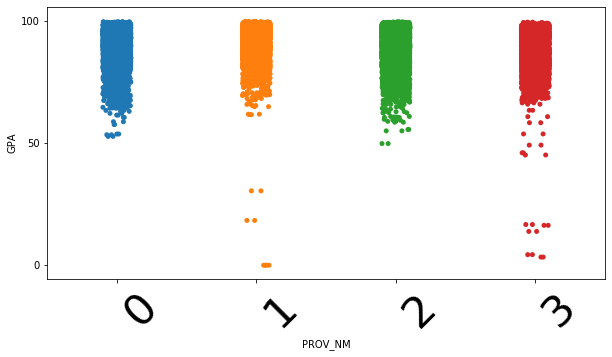

In [109]:
plt.figure(figsize=(10,5))
a= sns.stripplot(y = "GPA", x = "PROV_NM", data = df)
plt.rcParams['font.size'] = "30"
plt.xticks(
    rotation=45, 
    horizontalalignment='left',
    fontweight='light',
    fontsize='x-large'  
)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

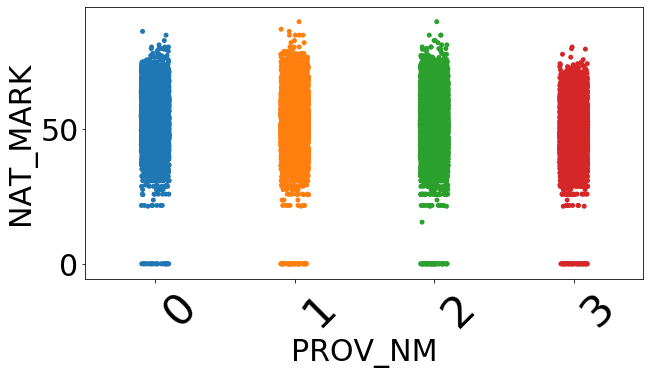

In [110]:
plt.figure(figsize=(10,5))
a= sns.stripplot(y = "NAT_MARK", x = "PROV_NM", data = df)
plt.xticks(
    rotation=45, 
    horizontalalignment='left',
    fontweight='light',
    fontsize='x-large'  
)

In [111]:
df.head()

CPR_NO  SCH_NM  PROV_NM  SUBM  Teacher_Gender  ACHIEVEMENTS1  \
0  70913390       0        0     1               1           28.0   
1  71105956       0        0     1               1           27.0   
2  70712190       0        0     1               1           27.0   
3  70207496       0        0     1               1           26.0   
4  70507953       0        0     1               1           25.0   

   ACHIEVEMENTS2  MIDTERM1  MIDTERM2  FINAL1  FINAL2  TOTAL1  TOTAL2  D_MARK  \
0           30.0      17.0      17.0    45.0    33.0    90.0      80      85   
1           29.0      14.0      16.0    41.5    37.0    83.0      82      83   
2           27.0      13.0      15.0    27.5    37.0    68.0      79      74   
3           24.5      15.0      12.0    44.0    32.5    85.0      69      77   
4           28.0      14.0      15.0    31.5    37.0    71.0      80      76   

   NAT_MARK   GPA  
0      53.7  92.9  
1      49.7  89.5  
2      52.1  86.2  
3      52.9  89.9  
4      52.1  86.2

In [112]:
df[df.NAT_MARK>75].SUBM.count()

167

In [113]:
df_Nt=df[df.NAT_MARK>50]

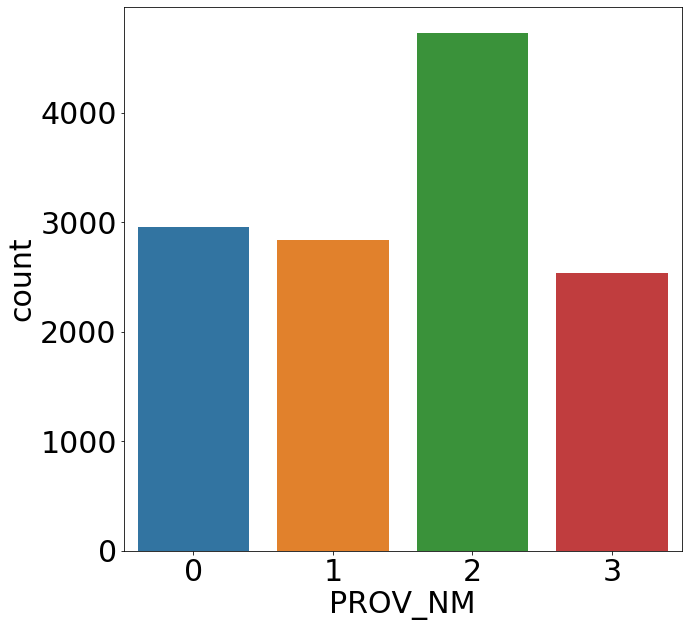

In [114]:
ax=sns.countplot("PROV_NM",  data=df_Nt)

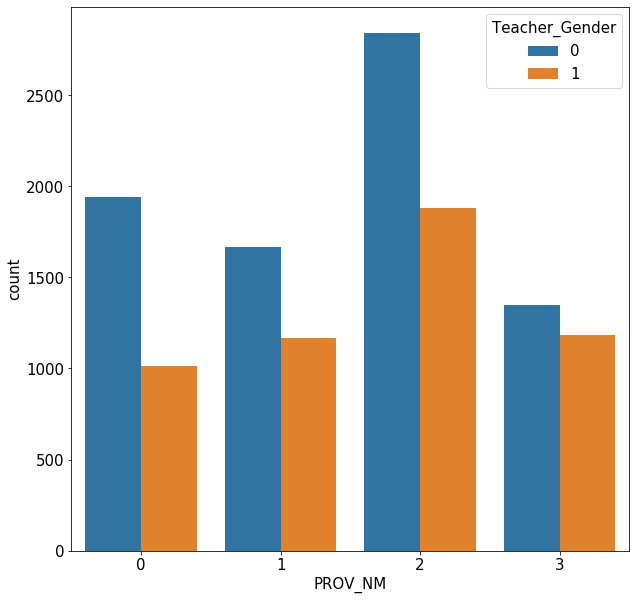

In [115]:
plt.rcParams['font.size'] = "15"
ax=sns.countplot("PROV_NM", hue="Teacher_Gender" ,data=df_Nt)


In [116]:
df[df.GPA>75].SUBM.count()/df.shape[0]


0.9675899131872675

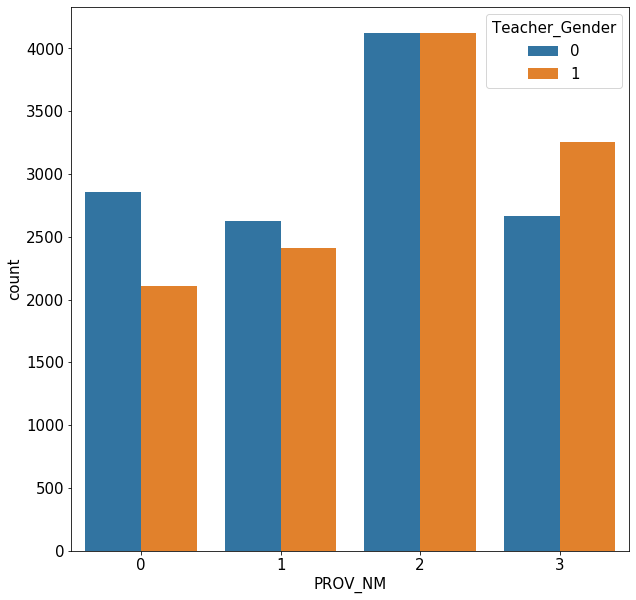

In [117]:
df_Gp=df[df.GPA>50]
ax=sns.countplot("PROV_NM", hue="Teacher_Gender" ,data=df_Gp)

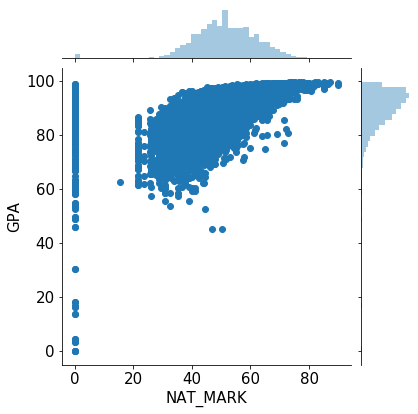

In [118]:
sns.jointplot(df.NAT_MARK, df.GPA, data=df);

In [119]:
df.keys()

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

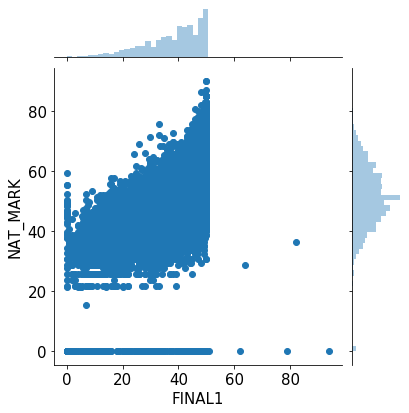

In [120]:
sns.jointplot(df.FINAL1, df.NAT_MARK, data=df);

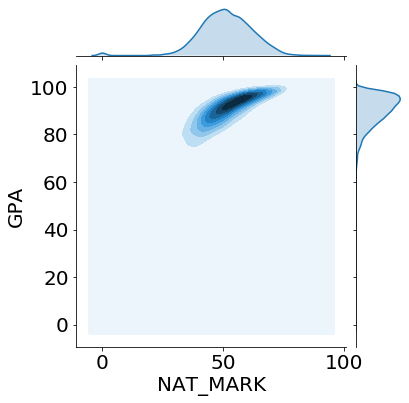

In [121]:
plt.rcParams['font.size'] = "20"
sns.jointplot(df.NAT_MARK, df.GPA, data=df, kind="kde");


/Users/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


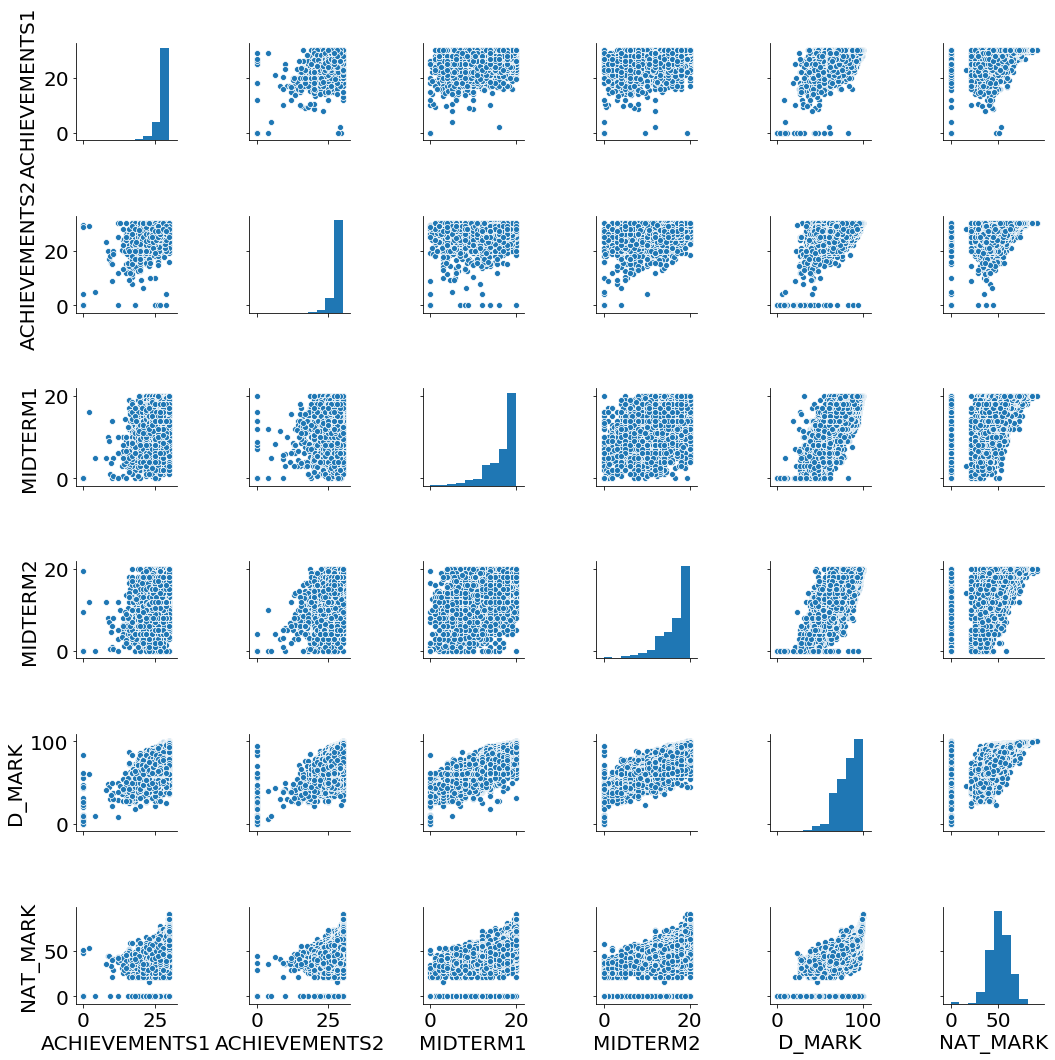

In [122]:
sns.pairplot(df.loc[:,['ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2',
         'D_MARK', 'NAT_MARK']]);

In [123]:
df.keys()

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

/Users/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/Users/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


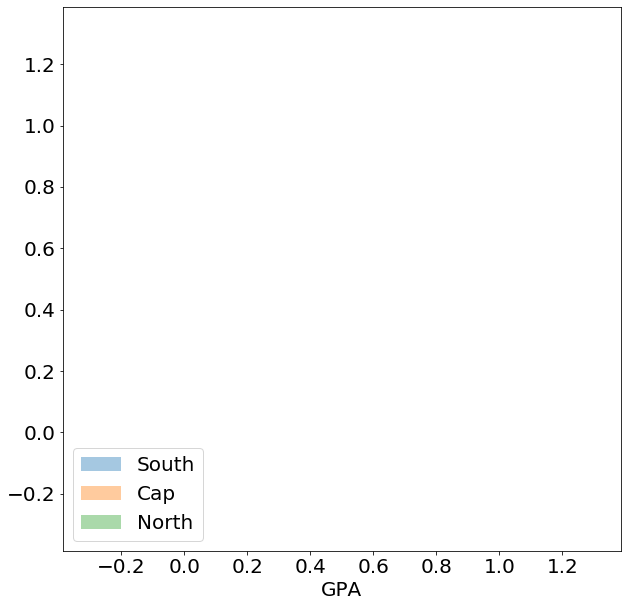

In [124]:
plt.figure(figsize=(10,10))
# for i in df.PROV_NM.unique():

sns.distplot(df.GPA[df.PROV_NM=="South"],         kde=1,label='{}'.format("South"))


sns.distplot(df.GPA[df.PROV_NM=="Cap"],         kde=1,label='{}'.format("Cap"))
sns.distplot(df.GPA[df.PROV_NM=="North"],         kde=1,label='{}'.format("North"))


# sns.distplot(df.GPA[df.PROV_NM=="Muharaq"],         kde=1,label='{}'.format("Muharaq"))


plt.legend()

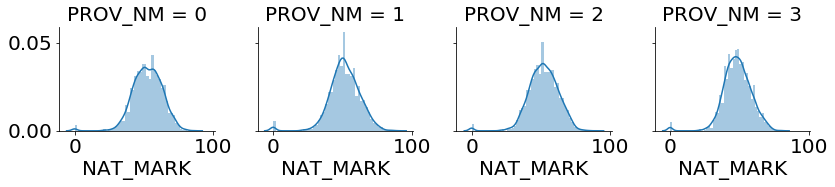

In [125]:
g=sns.FacetGrid(df, col="PROV_NM")
g.map(sns.distplot,"NAT_MARK", bins=50 )

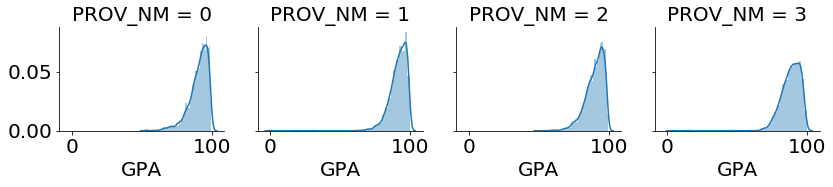

In [126]:
g=sns.FacetGrid(df, col="PROV_NM")
g.map(sns.distplot,"GPA" )

 plot 4. grpahs, each for A province.   draw average and the mean adn The mode .   observe their order and look if the mean is far less or more than the average.  
 if data was for a prduct to sale, we could say that those item are over or under priced
 

In [127]:
from scipy.stats import shapiro

shap_w, shap_p = shapiro(df['GPA'])
shap_p

std_scaler=StandardScaler(copy=True, with_mean=True, with_std=True)

scaled_Arry=std_scaler.fit_transform(df.iloc[:,5:])

scaled_df=pd.DataFrame(scaled_Arry, columns=df.columns)

scaled_df.head()

/Users/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ValueError: Shape of passed values is (24190, 11), indices imply (24190, 16)

In [ ]:
scaled_df.head()

In [ ]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(df["GPA"], df.SUBM, data=df)

In [ ]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(df["NAT_MARK"], df.SUBM, data=df)

In [ ]:
#. compare those who are.  doing great in both SUbj

In [ ]:
# tracking correlatin between both Achievements
sns.relplot(x="ACHIEVEMENTS1", y="ACHIEVEMENTS2", data=df)

In [ ]:
sns.relplot(x="ACHIEVEMENTS1", y="ACHIEVEMENTS2", data=df, hue="PROV_NM")
plt.show()

In [ ]:
sns.relplot(x="ACHIEVEMENTS1", y="ACHIEVEMENTS2", data=df, hue="Teacher_Gender")

In [ ]:
sns.relplot(x="NAT_MARK", y="GPA", data=df)

In [ ]:
sns.relplot(x="NAT_MARK", y="D_MARK", data=df)

In [ ]:
g=sns.FacetGrid(df, col="SUBM", hue="Teacher_Gender")
g.map(sns.distplot, "NAT_MARK", bins=50)
g.add_legend()
plt.show()

In [ ]:
g=sns.FacetGrid(df, col="SUBM", hue="Teacher_Gender")
g.map(sns.distplot, "GPA", bins=50)
g.add_legend()

In [ ]:
g=sns.FacetGrid(df, col="SUBM", hue="Teacher_Gender")
g.map(sns.distplot, "TOTAL1", bins=50)
g.add_legend()

In [ ]:
g=sns.FacetGrid(df, col="SUBM", hue="Teacher_Gender")
g.map(sns.distplot, "TOTAL2", bins=50)
g.add_legend()

In [ ]:
A=df[df.NAT_MARK>70]
g=sns.FacetGrid(A, col="SUBM", hue="Teacher_Gender")
g.map(sns.distplot, "TOTAL1", bins=50)
g.add_legend()

In [ ]:
g=sns.FacetGrid(A, col="SUBM", hue="Teacher_Gender")
g.map(sns.distplot, "TOTAL2", bins=50)
g.add_legend()

In [ ]:
g=sns.FacetGrid(A, col="SUBM", hue="Teacher_Gender")
g.map(sns.distplot, "GPA", bins=50)
g.add_legend()

In [ ]:
g=sns.FacetGrid(A, col="SUBM", hue="Teacher_Gender")
g.map(sns.distplot, "NAT_MARK", bins=50)
g.add_legend()

In [ ]:
df.PROV_NM.value_counts().index

In [ ]:
df[df.GPA>75].SUBM.count()

In [ ]:
province=df.PROV_NM.value_counts().index
g=sns.FacetGrid(df, row="PROV_NM",row_order=province,  height=1.7,  aspect=4)
g.map(sns.distplot, "NAT_MARK", "GPA", hist=False, rug=True)
g.add_legend()

In [ ]:
province=df.PROV_NM.value_counts().index
g=sns.FacetGrid(df, row="PROV_NM",row_order=province,  height=1.7,  aspect=4)
g.map(sns.distplot, "TOTAL2", "TOTAL1", hist=False, rug=True)
plt.show()

In [ ]:
# à reviser
g=sns.FacetGrid(df, hue="PROV_NM",palette="Set1",  height=5,  hue_kws={"marker":["^", "v"]})
g.map(plt.scatter, "NAT_MARK", "GPA", s=100, linewidh=.5, edgecolor="white")
g.add_legend();

In [ ]:
df.keys()

In [ ]:
df["ACHIEVEMENTS1"].isnull().sum()

df.isnull().sum()

In [ ]:
# df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
#                    "toy": [np.nan, 'Batmobile', 'Bullwhip'],
#                    "born": [pd.NaT, pd.Timestamp("1940-04-25"),
#                             pd.NaT]})
# print(df)
# df.dropna()

In [ ]:

for i in df:
    sum(pd.isnull(df[i]))

In [ ]:
 %%timeit
 df.isnull().any().any()

In [ ]:
df.shape

In [ ]:
df.dropna()

In [ ]:
df.shape

In [ ]:
df=df.dropna()

df[df.isnull().any(axis=1)]

df.isnull().sum(axis=0)

df.ACHIEVEMENTS1.isnull().sum()

In [ ]:

sns.distplot(df["ACHIEVEMENTS1"], kde=False, bins=50)
sns.distplot(df["ACHIEVEMENTS2"], kde=False, bins=50)

plt.show()
# change bins from 20 to 50 to even more and lok at the trend which is wierdrly copied

In [ ]:
sns.distplot(df["ACHIEVEMENTS1"], kde=False, bins=100)



In [ ]:
sns.distplot(df["TOTAL1"], kde=False, bins=50)
sns.distplot(df["TOTAL2"], kde=False, bins=50)

In [ ]:
sns.distplot(df["MIDTERM1"], kde=False, bins=50)
sns.distplot(df["TOTAL1"], kde=False, bins=50)

In [ ]:
#. by subject

In [ ]:
sns.distplot(df["MIDTERM2"], kde=False, bins=50)
sns.distplot(df["TOTAL2"], kde=False, bins=50)

In [ ]:
sns.boxplot(df.TOTAL1, df.SUBM, data=df)

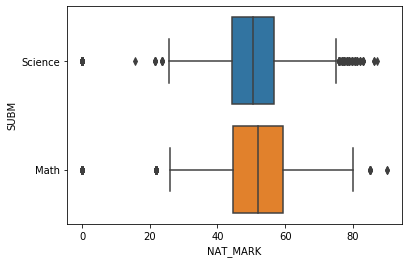

In [112]:
sns.boxplot(df.NAT_MARK, df.SUBM, data=df)

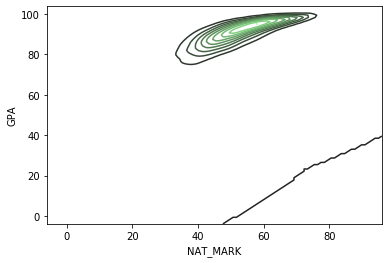

In [71]:
pal = sns.dark_palette("palegreen", as_cmap=True)
sns.kdeplot(df.NAT_MARK, df.GPA, cmap=pal);

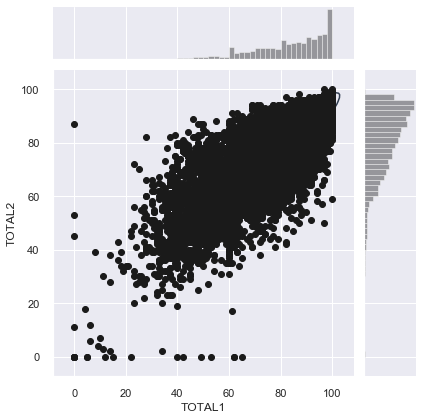

In [285]:
g = (sns.jointplot("TOTAL1", "TOTAL2",
           data=df, color="k")
.plot_joint(sns.kdeplot, zorder=0, n_levels=2))

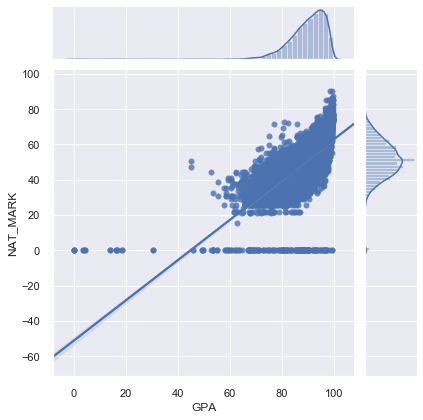

In [287]:
g = sns.jointplot("GPA", "NAT_MARK", data=df, kind="reg")

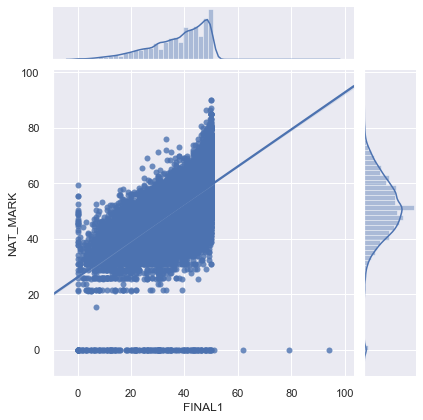

In [291]:
g = sns.jointplot("FINAL1", "NAT_MARK", data=df, kind="reg")

In [ ]:
import matplotlib.gridspec as gridspec
for feature in raw_data['feature_names']:
    print(feature)
    #sns.boxplot(data=data,x=data.target,y=data[feature])
    gs1 = gridspec.GridSpec(3,1)
    ax1 = plt.subplot(gs1[:-1])
    ax2 = plt.subplot(gs1[-1])
    gs1.update(right=0.60)
    sns.boxplot(x=feature,y='class',data=data,ax=ax2)
    sns.kdeplot(data[feature][data.target==0],ax=ax1,label='0')
    sns.kdeplot(data[feature][data.target==1],ax=ax1,label='1')
    sns.kdeplot(data[feature][data.target==2],ax=ax1,label='2')
    ax2.yaxis.label.set_visible(False)
    ax1.xaxis.set_visible(False)
    plt.show()

In [113]:
df.SUBM.count()

24172

In [114]:
df.groupby('SUBM').size()

SUBM
Math       12086
Science    12086
dtype: int64

In [115]:
df.groupby(["SUBM", "Teacher_Gender"]).size()

SUBM     Teacher_Gender
Math     F                 6130
         M                 5956
Science  F                 6130
         M                 5956
dtype: int64

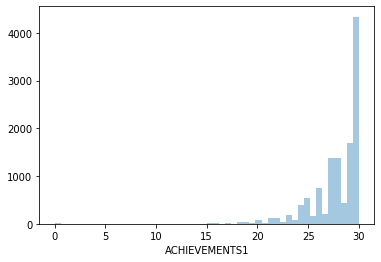

In [158]:
#fig, ax = plt.subplots(1,2)
#sns.distplot(df["ACHIEVEMENTS2"], kde=False, bins=50)
# it looks like a copy and Paste game. 
# change bins from 20 to 50 tddo even more and lok at the trend which is wierdrly copied

-student got the same Marks in both Achievement test 1 and 2 

-look at the variation of both tests for each student  / graph 
  - graph by different Provinces, teachers_gender, student gender maybe 

- determine the Std for both previous tests and graph 





##  SAme Makrs

In [118]:
df_same=df[df.TOTAL1==df.TOTAL2]

In [138]:
df_same.shape[0]/df.shape[0]

0.04674830382260467

In [79]:
df_same.head()

NameError: name 'df_same' is not defined

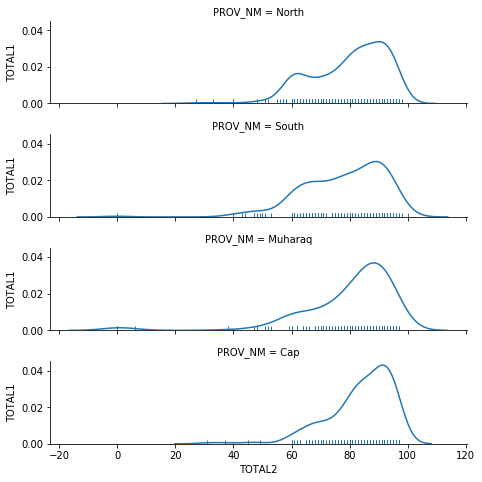

In [140]:
province=df.PROV_NM.value_counts().index
g=sns.FacetGrid(df_same, row="PROV_NM",row_order=province,  height=1.7,  aspect=4)
g.map(sns.distplot, "TOTAL2", "TOTAL1", hist=False, rug=True)
plt.show()

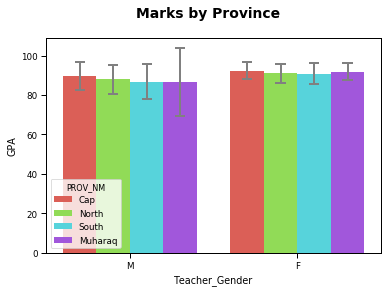

In [148]:
fig = plt.figure()
fig.suptitle('Marks by Province', fontsize='x-large', fontweight='bold')
fig.subplots_adjust(top=0.87)
sns.set_context('paper')
sns.barplot(x = 'Teacher_Gender', y = 'GPA', hue = 'PROV_NM', data = df_same,
            palette = 'hls',
            order = ['M', 'F'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )
plt.show()

In [149]:
df[df.TOTAL2>90].shape

(5912, 16)

In [15]:
s = pd.Series([1,2,3, np.nan, 5])
s

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
dtype: float64

In [16]:

s.value_counts(), s.value_counts(dropna = False)

(5.0    1
 3.0    1
 2.0    1
 1.0    1
 dtype: int64, 5.0    1
 NaN    1
 3.0    1
 2.0    1
 1.0    1
 dtype: int64)

In [26]:
df['ACHIEVEMENTS1'].value_counts(dropna=False)

30.0    7491
29.0    3602
28.0    2910
27.0    2163
29.5    1542
        ... 
9.6        1
21.8       1
20.6       1
15.2       1
15.9       1
Name: ACHIEVEMENTS1, Length: 129, dtype: int64

In [30]:
df['ACHIEVEMENTS1'].value_counts(dropna=False, bins=5)

(24.0, 30.0]     22457
(18.0, 24.0]      1553
(12.0, 18.0]       117
(-0.031, 6.0]       32
(6.0, 12.0]         13
Name: ACHIEVEMENTS1, dtype: int64

In [18]:
df.FINAL1.value_counts(dropna=False).head()

50.0    1652
49.0    1077
48.0     934
40.0     885
47.0     863
Name: FINAL1, dtype: int64

In [22]:
df.isnull().sum()

CPR_NO        0
SCH_NM        0
PROV_NM       0
SUBM          0
STUFF_SEX     0
             ..
TOTAL1       16
TOTAL2        0
D_MARK        0
NAT_MARK      0
GPA           0
Length: 16, dtype: int64

In [25]:
df.ACHIEVEMENTS1.value_counts(normalize=True)

30.0    0.309904
29.0    0.149015
28.0    0.120387
27.0    0.089484
29.5    0.063793
          ...   
14.3    0.000041
9.6     0.000041
20.6    0.000041
23.2    0.000041
15.9    0.000041
Name: ACHIEVEMENTS1, Length: 128, dtype: float64

In [51]:
# dataframe containing only the object columns.
obj_df = df.select_dtypes(include=['object'])  #.copy()
obj_df.head()

SCH_NM         PROV_NM    SUBM STUFF_SEX
0  المعهد الديني الجعفري  محافظة العاصمة  العلوم    مدرسين
1  المعهد الديني الجعفري  محافظة العاصمة  العلوم    مدرسين
2  المعهد الديني الجعفري  محافظة العاصمة  العلوم    مدرسين
3  المعهد الديني الجعفري  محافظة العاصمة  العلوم    مدرسين
4  المعهد الديني الجعفري  محافظة العاصمة  العلوم    مدرسين

In [90]:
#clean up  NULL value
df[df.isnull().any(axis=1)]

CPR_NO                                         SCH_NM  \
901    70711321  مدرسة أحمد الفاتح الابتدائية الاعدادية للبنين   
4168   60820420          مدرسة الرفاع الشرقي الابتدائية للبنات   
4187   70613516          مدرسة الرفاع الشرقي الابتدائية للبنات   
4234   60820438          مدرسة الرفاع الشرقي الابتدائية للبنات   
5686   70800898                مدرسة الفارابي الإعدادية للبنين   
...         ...                                            ...   
17781  70800898                مدرسة الفارابي الإعدادية للبنين   
18375  70116075               مدرسة المستقبل الابتدائية للبنات   
20339  71001093                   مدرسة رقية الابتدائية للبنات   
21378  70922870                   مدرسة سمية الابتدائية للبنات   
21952  70405786         مدرسة عراد الابتدائية الإعدادية للبنين   

                 PROV_NM       SUBM STUFF_SEX  ACHIEVEMENTS1  ACHIEVEMENTS2  \
901    المحافظة الجنوبية     العلوم    مدرسين            NaN           28.0   
4168   المحافظة الجنوبية     العلوم    مدرسات            NaN           29.0   
4187   المحافظة الجنوبية     العلوم    مدرسات            NaN           26.5   
4234   المحافظة الجنوبية     العلوم    مدرسات            NaN           30.0   
5686   المحافظة الشمالية     العلوم    مدرسين            NaN            0.0   
...                  ...        ...       ...            ...            ...   
17781  المحافظة الشمالية  الرياضيات    مدرسين            NaN            0.0   
18375  المحافظة الجنوبية  الرياضيات    مدرسات            NaN           29.5   
20339      محافظة المحرق  الرياضيات    مدرسات            NaN           29.0   
21378     محافظة العاصمة  الرياضيات    مدرسات            NaN           25.0   
21952      محافظة المحرق  الرياضيات    مدرسين            NaN            0.0   

       MIDTERM1  MIDTERM2  FINAL1  FINAL2  TOTAL1  TOTAL2  D_MARK  NAT_MARK  \
901         NaN      13.0     NaN    26.0     NaN      67      67      45.2   
4168        NaN      12.5     NaN    25.0     NaN      67      67      41.1   
4187        NaN       6.0     NaN    25.0     NaN      58      58      37.7   
4234        NaN      17.0     NaN    43.5     NaN      91      91      59.8   
5686        NaN       0.0    82.0    58.0    82.0      58      70      36.5   
...         ...       ...     ...     ...     ...     ...     ...       ...   
17781       NaN       0.0    64.0    49.5    64.0      50      57      28.8   
18375       NaN      15.5     NaN    37.0     NaN      82      82      46.3   
20339       NaN      20.0     NaN    42.0     NaN      91      91      59.3   
21378       NaN      14.0     NaN    28.5     NaN      68      68      41.6   
21952       NaN       0.0     NaN    94.0     NaN      94      94       0.0   

             GPA  
901    79.222222  
4168   84.800000  
4187   74.300000  
4234   96.000000  
5686   82.181818  
...          ...  
17781  82.181818  
18375  84.222222  
20339  95.555556  
21378  81.000000  
21952  90.500000  

[18 rows x 16 columns]

In [78]:
np.count_nonzero(obj_df.isnull())

NameError: name 'obj_df' is not defined

In [65]:
obj_df.apply(lambda x: sum(x.isnull().values), axis = 1) # For rows

0        1
1        1
2        1
3        1
4        1
        ..
24185    1
24186    1
24187    1
24188    1
24189    1
Length: 24190, dtype: int64

In [11]:
#clean up  NULL value
obj_df[obj_df.isnull().any(axis=1)]

Empty DataFrame
Columns: [SCH_NM, PROV_NM, SUBM, STUFF_SEX]
Index: []

In [12]:
obj_df["SCH_NM"].value_counts()

مدرسة الامام الطبرى الابتدائية للبنين            864
مدرسة ابن سينا الابتدائية للبنين                 826
مدرسة مالك بن انس الابتدائية للبنين              804
مدرسة البسيتين الابتدائية للبنين                 626
مدرسة أحمد الفاتح الابتدائية الاعدادية للبنين    524
                                                ... 
مدرسة الجسرة الابتدائية للبنين                    66
مدرسة جو الابتدائية الاعدادية للبنات              66
مدرسة عين جالوت الابتدائية للبنات                 52
مدرسة سكينة بنت الحسين الابتدائية للبنات          36
مدرسة عائشة ام المؤمنين الاعدادية للبنات          34
Name: SCH_NM, Length: 99, dtype: int64

In [13]:
# obj_df = obj_df.fillna({"num_doors": "four"})
# En cas où on veut replacer une valeur par une autre

In [14]:
df_copy=df

In [15]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

In [16]:
df_copy['SCH__NM'] = lb_make.fit_transform(df_copy['SCH_NM'])

In [141]:
df_copy.head()

CPR_NO                 SCH_NM         PROV_NM    SUBM STUFF_SEX  ACHIEVEMENTS1  ACHIEVEMENTS2  MIDTERM1  MIDTERM2  FINAL1  FINAL2  TOTAL1  TOTAL2  D_MARK  NAT_MARK   GPA  SCH__NM
0  70913390  المعهد الديني الجعفري  محافظة العاصمة  العلوم    مدرسين           28.0           30.0      17.0      17.0    45.0    33.0    90.0      80      85      53.7  92.9        0
1  71105956  المعهد الديني الجعفري  محافظة العاصمة  العلوم    مدرسين           27.0           29.0      14.0      16.0    41.5    37.0    83.0      82      83      49.7  89.5        0
2  70712190  المعهد الديني الجعفري  محافظة العاصمة  العلوم    مدرسين           27.0           27.0      13.0      15.0    27.5    37.0    68.0      79      74      52.1  86.2        0
3  70207496  المعهد الديني الجعفري  محافظة العاصمة  العلوم    مدرسين           26.0           24.5      15.0      12.0    44.0    32.5    85.0      69      77      52.9  89.9        0
4  70507953  المعهد الديني الجعفري  محافظة العاصمة  العلوم    مدرسين           25.0           28.0      14.0      15.0    31.5    37.0    71.0      80      76      52.1  86.2        0

In [17]:
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

#df_Encoded = df[df.columns.difference(['B', 'D'])]


# Encoding the variable
obj_df =obj_df.apply(lambda x: d[x.name].fit_transform(x))

In [20]:
obj_df.tail()

SCH_NM  PROV_NM  SUBM  STUFF_SEX
24185      98        0     0          1
24186      98        0     0          1
24187      98        0     0          1
24188      98        0     0          1
24189      98        0     0          1

In [77]:
df.drop(['SCH_NM','PROV_NM','SUBM', 'STUFF_SEX'], axis=1)

KeyError: "['STUFF_SEX'] not found in axis"

In [76]:
pd.concat([df, obj_df])

NameError: name 'obj_df' is not defined

In [23]:
df.head()

CPR_NO                 SCH_NM         PROV_NM    SUBM STUFF_SEX  \
0  70913390  المعهد الديني الجعفري  محافظة العاصمة  العلوم    مدرسين   
1  71105956  المعهد الديني الجعفري  محافظة العاصمة  العلوم    مدرسين   
2  70712190  المعهد الديني الجعفري  محافظة العاصمة  العلوم    مدرسين   
3  70207496  المعهد الديني الجعفري  محافظة العاصمة  العلوم    مدرسين   
4  70507953  المعهد الديني الجعفري  محافظة العاصمة  العلوم    مدرسين   

   ACHIEVEMENTS1  ACHIEVEMENTS2  MIDTERM1  MIDTERM2  FINAL1  FINAL2  TOTAL1  \
0           28.0           30.0      17.0      17.0    45.0    33.0    90.0   
1           27.0           29.0      14.0      16.0    41.5    37.0    83.0   
2           27.0           27.0      13.0      15.0    27.5    37.0    68.0   
3           26.0           24.5      15.0      12.0    44.0    32.5    85.0   
4           25.0           28.0      14.0      15.0    31.5    37.0    71.0   

   TOTAL2  D_MARK  NAT_MARK   GPA  SCH__NM  
0      80      85      53.7  92.9        0  
1      82      83      49.7  89.5        0  
2      79      74      52.1  86.2        0  
3      69      77      52.9  89.9        0  
4      80      76      52.1  86.2        0

In [65]:
feature_names=(df.iloc[:,7:18]).columns

In [66]:
feature_names

Index(['ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

- eta: It is also known as the learning rate or the shrinkage factor. It actually shrinks the feature weights to make the boosting process more conservative. The range is 0 to 1. Low eta value means the model is more robust to overfitting.

- gamma: The range is 0 to ∞. Larger the gamma more conservative the algorithm is.
- max_depth: We can specify maximum depth of a tree using this parameter.
- subsample: It is the proportion of rows that the model will randomly select to grow trees.
- colsample_bytree: It is the ratio of variables randomly chosen to build each tree in the model.

# Skewness

*skewness = 0 : normally distributed.

*skewness > 0 : more weight in the left tail of the distribution.

*skewness < 0 : more weight in the right tail of the distribution

In [150]:
df.iloc[6:16].skew()

CPR_NO          -0.171293
ACHIEVEMENTS1    0.218046
ACHIEVEMENTS2   -1.385865
MIDTERM1        -0.358600
MIDTERM2        -0.935082
                   ...   
TOTAL1           0.077588
TOTAL2          -1.227232
D_MARK          -0.558691
NAT_MARK        -0.171779
GPA             -1.128624
Length: 12, dtype: float64

Let us take a very common example of house prices. Suppose we have house values ranging from $100k to $1,000,000 with the average being $500,000.
If the peak of the distribution was left of the average value, portraying a positive skewness in the distribution. It would mean that many houses were being sold for less than the average value, i.e. $500k. This could be for many reasons, but we are not going to interpret those reasons here.
If the peak of the distributed data was right of the average value, that would mean a negative skew. This would mean that the houses were being sold for more than the average value.



In [151]:
(df.columns)

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [152]:
df.head()

CPR_NO                 SCH_NM PROV_NM     SUBM Teacher_Gender  \
0  70913390  المعهد الديني الجعفري     Cap  Science              M   
1  71105956  المعهد الديني الجعفري     Cap  Science              M   
2  70712190  المعهد الديني الجعفري     Cap  Science              M   
3  70207496  المعهد الديني الجعفري     Cap  Science              M   
4  70507953  المعهد الديني الجعفري     Cap  Science              M   

   ACHIEVEMENTS1  ACHIEVEMENTS2  MIDTERM1  MIDTERM2  FINAL1  FINAL2  TOTAL1  \
0           28.0           30.0      17.0      17.0    45.0    33.0    90.0   
1           27.0           29.0      14.0      16.0    41.5    37.0    83.0   
2           27.0           27.0      13.0      15.0    27.5    37.0    68.0   
3           26.0           24.5      15.0      12.0    44.0    32.5    85.0   
4           25.0           28.0      14.0      15.0    31.5    37.0    71.0   

   TOTAL2  D_MARK  NAT_MARK   GPA  
0      80      85      53.7  92.9  
1      82      83      49.7  89.5  
2      79      74      52.1  86.2  
3      69      77      52.9  89.9  
4      80      76      52.1  86.2

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24172 entries, 0 to 24189
Data columns (total 16 columns):
CPR_NO            24172 non-null int64
SCH_NM            24172 non-null object
PROV_NM           24172 non-null object
SUBM              24172 non-null object
Teacher_Gender    24172 non-null object
ACHIEVEMENTS1     24172 non-null float64
ACHIEVEMENTS2     24172 non-null float64
MIDTERM1          24172 non-null float64
MIDTERM2          24172 non-null float64
FINAL1            24172 non-null float64
FINAL2            24172 non-null float64
TOTAL1            24172 non-null float64
TOTAL2            24172 non-null int64
D_MARK            24172 non-null int64
NAT_MARK          24172 non-null float64
GPA               24172 non-null float64
dtypes: float64(9), int64(3), object(4)
memory usage: 3.8+ MB


# XGBoost  4. GPA

In [35]:
df.columns

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [36]:
# split data into X and y
X = df.iloc[:,5:15]
y = df.iloc[:,15]

In [37]:
X.head()

ACHIEVEMENTS1  ACHIEVEMENTS2  MIDTERM1  MIDTERM2  FINAL1  FINAL2  TOTAL1  \
0           28.0           30.0      17.0      17.0    45.0    33.0    90.0   
1           27.0           29.0      14.0      16.0    41.5    37.0    83.0   
2           27.0           27.0      13.0      15.0    27.5    37.0    68.0   
3           26.0           24.5      15.0      12.0    44.0    32.5    85.0   
4           25.0           28.0      14.0      15.0    31.5    37.0    71.0   

   TOTAL2  D_MARK  NAT_MARK  
0      80      85      53.7  
1      82      83      49.7  
2      79      74      52.1  
3      69      77      52.9  
4      80      76      52.1

In [38]:
y.head()

0    92.9
1    89.5
2    86.2
3    89.9
4    86.2
Name: GPA, dtype: float64

In [39]:
# Split dataset
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest=train_test_split(X, y, test_size=0.3)

# XGBoost's hyperparameters

In [40]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [41]:
xg_reg.fit(Xtrain,ytrain)


/Users/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [42]:
preds = xg_reg.predict(Xtest)

In [43]:
rmse = np.sqrt(mean_squared_error(ytest, preds))
print("RMSE: %f" % (rmse))

RMSE: 31.322064


# k-fold Cross Validation using XGBoost

In [44]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

/Users/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [45]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [46]:
cv_results.head()

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0        80.617879        0.044406       80.617750       0.096869
1        72.576235        0.040283       72.577843       0.095339
2        65.339900        0.035925       65.341209       0.093741
3        58.826838        0.032364       58.828260       0.092489
4        52.965514        0.028457       52.967107       0.090566

In [47]:
print((cv_results["test-rmse-mean"]).tail(1))

49    2.907892
Name: test-rmse-mean, dtype: float64


In [48]:
preds = xg_reg.predict(Xtest)

In [49]:
print(preds)

[61.513435 63.31265  56.25542  ... 59.815643 57.74689  63.31265 ]


In [50]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [51]:
#!pip install graphviz


In [55]:
type(xg_reg)

xgboost.core.Booster

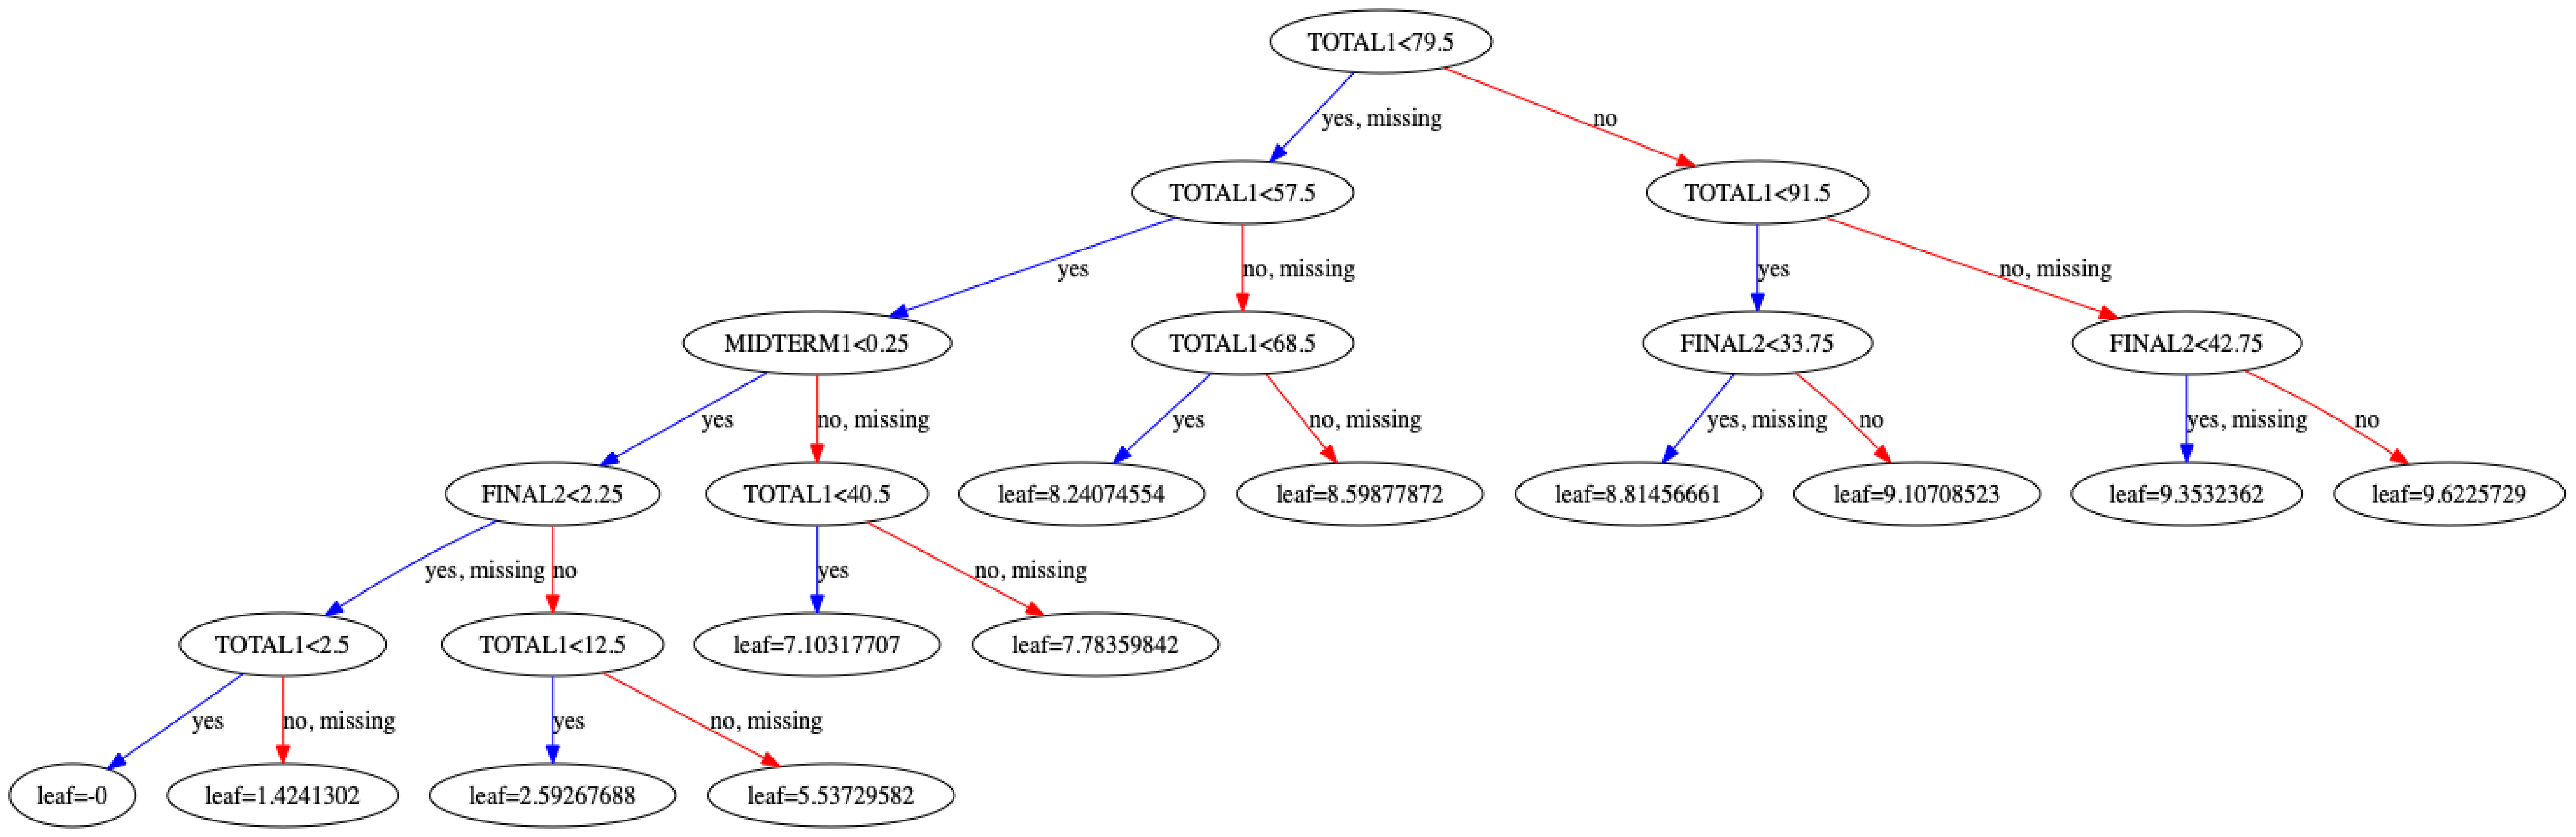

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [100, 60]
xgb.plot_tree(xg_reg,num_trees=0)
plt.show()

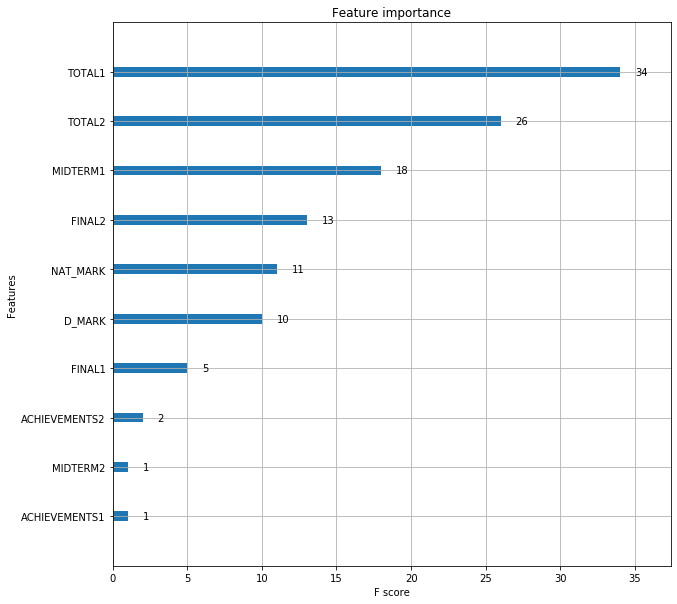

In [62]:
plt.rcParams['figure.figsize'] = [10, 10]
xgb.plot_importance(xg_reg)
plt.show()

# XGBoost 4 NAT_MARK

In [63]:
df.keys()

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [64]:
# split data into X and y
X_N = df.loc[:,['ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'GPA']]
y_N = df.loc[:,"NAT_MARK"]

In [65]:
X_N.head()

ACHIEVEMENTS1  ACHIEVEMENTS2  MIDTERM1  MIDTERM2  FINAL1  FINAL2  TOTAL1  \
0           28.0           30.0      17.0      17.0    45.0    33.0    90.0   
1           27.0           29.0      14.0      16.0    41.5    37.0    83.0   
2           27.0           27.0      13.0      15.0    27.5    37.0    68.0   
3           26.0           24.5      15.0      12.0    44.0    32.5    85.0   
4           25.0           28.0      14.0      15.0    31.5    37.0    71.0   

   TOTAL2  D_MARK   GPA  
0      80      85  92.9  
1      82      83  89.5  
2      79      74  86.2  
3      69      77  89.9  
4      80      76  86.2

In [66]:
# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_N, y_N, test_size=0.3)

In [75]:
xreg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [73]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [74]:
xreg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [179]:
preds_N = xreg.predict(X_test)

In [180]:
rmse = np.sqrt(mean_squared_error(y_test, preds_N))
print("RMSE: %f" % (rmse))

RMSE: 19.232467


In [181]:
d_Mtrix = xgb.DMatrix(data=X_N,label=y_N)

/Users/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [182]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

c_res = xgb.cv(dtrain=d_Mtrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [183]:
c_res.head()

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0        46.713590        0.048976       46.717571       0.112755
1        42.142628        0.042313       42.148860       0.107827
2        38.037029        0.031309       38.047973       0.109126
3        34.352033        0.026934       34.363874       0.104155
4        31.045378        0.019580       31.060193       0.102334

In [184]:
print((c_res["test-rmse-mean"]).tail(1))

49    6.216174
Name: test-rmse-mean, dtype: float64


In [185]:
preds_N = xreg.predict(X_test)

In [186]:
print(preds_N)

[36.794384 22.916971 37.97633  ... 35.68839  35.699505 29.465666]


In [187]:
xreg = xgb.train(params=params, dtrain=d_Mtrix, num_boost_round=10)

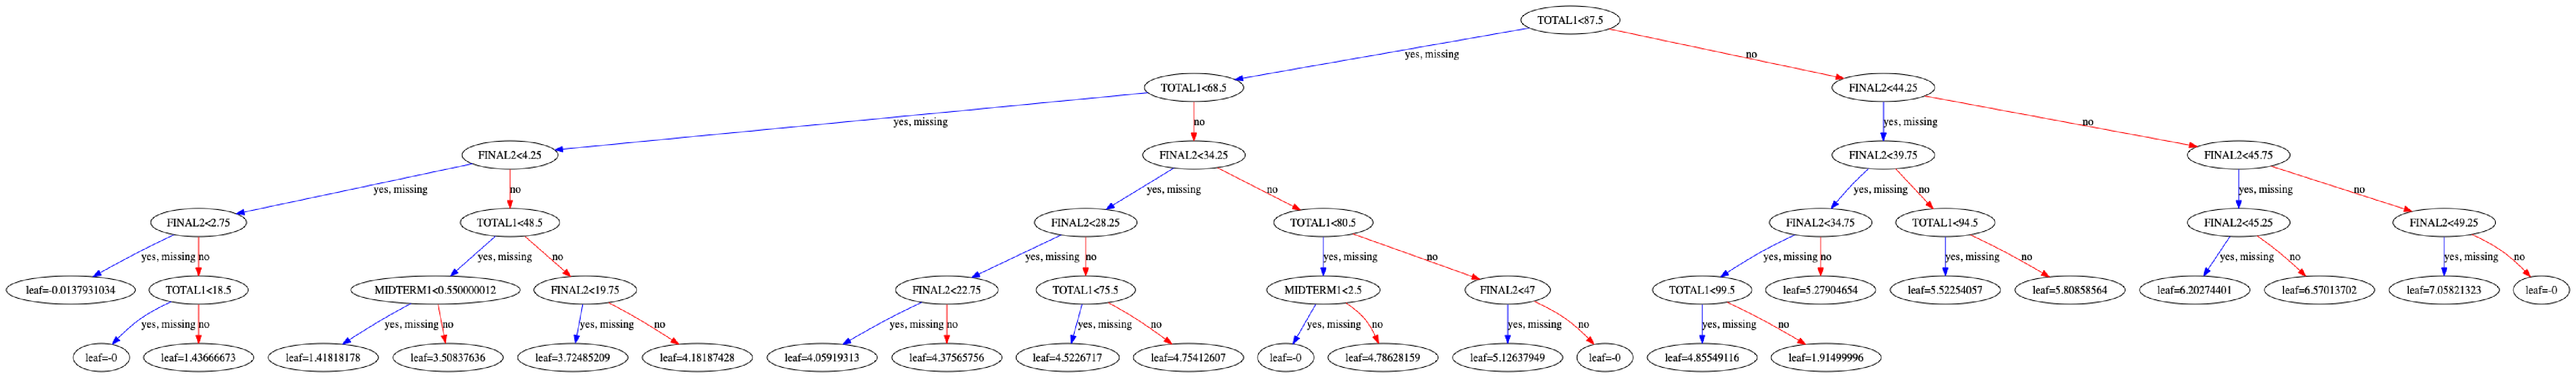

In [188]:
plt.rcParams['figure.figsize'] = [100, 150]


xgb.plot_tree(xreg,num_trees=0)
plt.show()

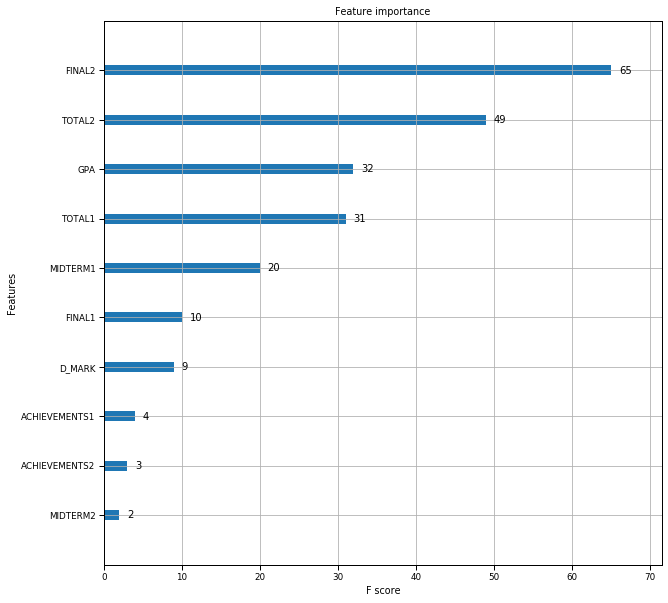

In [189]:
plt.rcParams['figure.figsize'] = [10, 10]
xgb.plot_importance(xreg)
plt.show()

In [191]:
import pandas_profiling as pp

In [192]:
pp.ProfileReport(df)

In [ ]:
df.keys()

In [ ]:
import seaborn as sns
from itertools import product
sns.set(style="darkgrid")

color = sns.color_palette()[5]
g = sns.jointplot("NAT_MARK", "TOTAL1", data=df, kind="reg", stat_func=None,
                  xlim=(0, 60), ylim=(0, 12), color='k', size=7)

#Clear the axes containing the scatter plot
g.ax_joint.cla()

#Generate some colors and markers
colors = np.random.random((len(df),3))
markers = ['x','o','v','^','<']*100

#Plot each individual point separately
for i,row in enumerate(df.values):
    g.ax_joint.plot(row[0], row[1], color=colors[i], marker=markers[i])

g.set_axis_labels('NAT_MARK', 'TOTAL1', fontsize=16)